In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')


***REMOVING OUTLIERS***

In [ ]:
def remove_outliers_iqr(dataset, column, lower_bound_factor=1.5, upper_bound_factor=1.5):
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - lower_bound_factor * iqr
    upper_bound = q3 + upper_bound_factor * iqr
    dataset_filtered = dataset.loc[(dataset[column] >= lower_bound) & (dataset[column] <= upper_bound)]
    return dataset_filtered

# Specify the columns with numerical data where you want to remove outliers
columns_with_numerical_data = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Remove outliers from each column
for column in columns_with_numerical_data:
    dataset = remove_outliers_iqr(dataset, column)

In [ ]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [ ]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural,Y
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,Rural
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [ ]:
print(y)

1      N
2      Y
3      Y
4      Y
6      Y
      ..
607    Y
608    Y
609    Y
612    Y
613    N
Name: Loan_Status, Length: 415, dtype: object


TAKING CARE OF MISSING DATA

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                8
Married               1
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       35
Property_Area         0
dtype: int64

In [ ]:
mean_LoanAmount = X['LoanAmount'].mean()
X['LoanAmount'].fillna(mean_LoanAmount, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                8
Married               1
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       35
Property_Area         0
dtype: int64

In [ ]:
mean_Loan_Amount_Term = X['Loan_Amount_Term'].mean()
X['Loan_Amount_Term'].fillna(mean_Loan_Amount_Term, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                8
Married               1
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       35
Property_Area         0
dtype: int64

In [ ]:
mode_credit_history =  X['Credit_History'].mode()[0]
X['Credit_History'].fillna(mode_credit_history, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                8
Married               1
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
mode_Gender = X['Gender'].mode()[0]
X['Gender'].fillna(mode_Gender, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                0
Married               1
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
mode_Married = X['Married'].mode()[0]
X['Married'].fillna(mode_Married, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                0
Married               0
Dependents            9
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
mode_Dependents = X['Dependents'].mode()[0]
X['Dependents'].fillna(mode_Dependents, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        24
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

In [ ]:
mode_Self_Employed = X['Self_Employed'].mode()[0]
X['Self_Employed'].fillna(mode_Self_Employed, inplace=True)

In [ ]:
missing_data = X.isnull()
missing_count_per_column = missing_data.sum()

In [ ]:
missing_count_per_column

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

ENCODING DEPENDENT DATA

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [ ]:
y

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,

***ENCODING INDEPENDENT DATA***

In [ ]:
X= pd.get_dummies(X, columns=['Property_Area'])

In [ ]:
X

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1,0,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0,0,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0,0,1
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Male,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,1,0,0
608,LP002974,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,1,0,0
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,1,0,0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,0,0,1


In [ ]:
X= pd.get_dummies(X, columns=['Gender'])
X

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male
1,LP001003,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1
2,LP001005,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0,0,1,0,1
3,LP001006,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0,0,1,0,1
4,LP001008,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0,0,1,0,1
6,LP001013,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,Yes,2,Not Graduate,No,3987,1411.0,157.0,360.0,1.0,1,0,0,0,1
608,LP002974,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,1,0,0,0,1
609,LP002978,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,1,0,0,1,0
612,LP002984,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,0,0,1,0,1


In [ ]:
X= pd.get_dummies(X, columns=['Married'])

In [ ]:
X= pd.get_dummies(X, columns=['Education'])

In [ ]:
X= pd.get_dummies(X, columns=['Self_Employed'])

In [ ]:
X

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,LP001003,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
2,LP001005,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,1,0,1,1,0,0,1
3,LP001006,0,2583,2358.0,120.0,360.0,1.0,0,0,1,0,1,0,1,0,1,1,0
4,LP001008,0,6000,0.0,141.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0
6,LP001013,0,2333,1516.0,95.0,360.0,1.0,0,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,LP002964,2,3987,1411.0,157.0,360.0,1.0,1,0,0,0,1,0,1,0,1,1,0
608,LP002974,0,3232,1950.0,108.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
609,LP002978,0,2900,0.0,71.0,360.0,1.0,1,0,0,1,0,1,0,1,0,1,0
612,LP002984,2,7583,0.0,187.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0


In [ ]:
X= X.drop(columns=['Loan_ID'])

***SPLITTING INTO TRAINING AND TESTING SET***




In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
X_train

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
238,1,3812,0.0,112.0,360.0,1.0,1,0,0,1,0,1,0,1,0,1,0
147,1,1538,1425.0,30.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0
17,0,3510,0.0,76.0,360.0,0.0,0,0,1,1,0,1,0,1,0,1,0
553,0,2454,2333.0,181.0,360.0,0.0,0,0,1,0,1,0,1,0,1,1,0
249,0,1809,1868.0,90.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3+,8750,4996.0,130.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
108,2,3800,3600.0,216.0,360.0,0.0,0,0,1,0,1,0,1,1,0,1,0
584,1,2787,1917.0,146.0,360.0,0.0,1,0,0,0,1,0,1,1,0,1,0
343,3+,3173,0.0,74.0,360.0,1.0,0,1,0,0,1,0,1,0,1,1,0


In [ ]:
X_test

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
574,3+,6406,0.0,150.0,360.0,1.0,0,1,0,0,1,0,1,1,0,1,0
156,1,6000,0.0,160.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
279,0,4100,0.0,124.0,360.0,1.0,1,0,0,1,0,0,1,0,1,1,0
243,2,6250,1300.0,108.0,360.0,1.0,1,0,0,0,1,0,1,1,0,0,1
139,2,4200,1430.0,129.0,360.0,1.0,1,0,0,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1,3450,2079.0,162.0,360.0,1.0,0,1,0,0,1,0,1,1,0,0,1
187,0,2383,2138.0,58.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
357,1,3875,0.0,67.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0
219,2,4283,2383.0,127.0,360.0,1.0,0,1,0,1,0,0,1,1,0,1,0


In [ ]:
X.dtypes

Dependents                  object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
dtype: object

In [ ]:
X['Dependents'] = X['Dependents'].replace('3+', '4')

In [ ]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,4583,1508.0,128.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
2,0,3000,0.0,66.0,360.0,1.0,0,0,1,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120.0,360.0,1.0,0,0,1,0,1,0,1,0,1,1,0
4,0,6000,0.0,141.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0
6,0,2333,1516.0,95.0,360.0,1.0,0,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2,3987,1411.0,157.0,360.0,1.0,1,0,0,0,1,0,1,0,1,1,0
608,0,3232,1950.0,108.0,360.0,1.0,1,0,0,0,1,0,1,1,0,1,0
609,0,2900,0.0,71.0,360.0,1.0,1,0,0,1,0,1,0,1,0,1,0
612,2,7583,0.0,187.0,360.0,1.0,0,0,1,0,1,0,1,1,0,1,0


In [ ]:
X.dtypes

Dependents                  object
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
dtype: object

In [ ]:
X['Dependents'] = X['Dependents'].astype(int)

In [ ]:
X.dtypes

Dependents                   int64
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Property_Area_Rural          uint8
Property_Area_Semiurban      uint8
Property_Area_Urban          uint8
Gender_Female                uint8
Gender_Male                  uint8
Married_No                   uint8
Married_Yes                  uint8
Education_Graduate           uint8
Education_Not Graduate       uint8
Self_Employed_No             uint8
Self_Employed_Yes            uint8
dtype: object

***FEATURE SCALING***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ***KNN***

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

***CONFUSION MATRIX***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 5 13]
 [ 2 63]]


0.8192771084337349

***PREDICTING TEST RESULTS***

In [ ]:
print(y_pred,y_test)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1] [0 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1
 1 1 0 1 1 1 0 1 1]


***K FOLD CROSS VALIDATION***

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.69 %
Standard Deviation: 4.58 %


***GRID SEARCH***

In [ ]:
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False,verbose=1)
grid_search=grid.fit(X_train, y_train)
print(grid_search.best_params_)
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )


Fitting 10 folds for each of 30 candidates, totalling 300 fits
{'n_neighbors': 16}
Accuracy for our training dataset with tuning is : 77.71%


# ***RANDOM FOREST***



***Training***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=0)

***PREDICTING THE TEST RESULTS***

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]]


 ***CONFUSION MATRIX***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6 12]
 [ 3 62]]


0.8192771084337349

***KFOLD CROSS VALIDATION ***

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.44 %
Standard Deviation: 4.22 %


***GRID SEARCH***

In [ ]:
rf = RandomForestClassifier()
grid_space={'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200],
              'max_features':[1,3,5,7],
              'min_samples_leaf':[1,2,3],
              'min_samples_split':[1,2,3]
           }
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(rf,param_grid=grid_space,cv=3,scoring='accuracy')
model_grid = grid.fit(X_train,y_train)
print('Best hyperparameters are: '+str(model_grid.best_params_))
accuracy = grid_search.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Best hyperparameters are: {'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy for our training dataset with tuning is : 77.71%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
432 fits failed out of a total of 1296.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
432 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/u

# ***DECISION TREE***


***Training***

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

***CONFUSION*** ***MATRIX***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6 12]
 [ 3 62]]


0.8192771084337349

***PREDICTING THE TEST RESULTS***

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 1]
 [1 1]
 [0 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [0 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [0 1]]


***K FOLD CROSS VALIDATION***

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.40 %
Standard Deviation: 6.21 %


***GRID SEARCH***

# ***KERNEL SVM***

***TRAINING***

In [ ]:
from sklearn.svm import SVC
classifier = SVC( probability=True,kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=0)

***PREDICTING THE TEST RESULTS***

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [1 0]
 [1 1]
 [1 1]]


***CONFUSION MATRIX***

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[ 6 12]
 [ 0 65]]


0.8554216867469879

***K-FOLD CROSS VALIDATION***

In [ ]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 82.54 %
Standard Deviation: 3.94 %


***GRID SEARCH***

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.54 %
Best Parameters: {'C': 0.25, 'kernel': 'linear'}


***PRECISION***

In [ ]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8441558441558441


***RECALL***

In [ ]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


***F1 SCORE***

In [ ]:
from sklearn.metrics import f1_score
f1score = f1_score(y_test, y_pred)
print("F1 score:", f1score)

F1 score: 0.9154929577464789


***AUC_ROC CURVE***

AUC-ROC: 0.7094017094017094


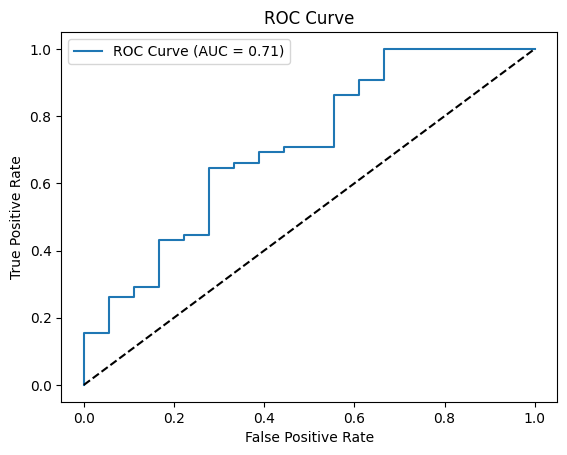

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_probs = classifier.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_probs)
print("AUC-ROC:", auc_roc)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal dotted line (random classifier)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()